Epoch 1/100
15/15 [==============================] - 5s 12ms/step - loss: 0.6832
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1053
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0637
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0692
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0573
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0516
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0414
Epoch 8/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0443
Epoch 9/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0434
Epoch 10/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0425
Epoch 11/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0400
Epoch 12/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0404
Epoch 13/100
15/15 [================

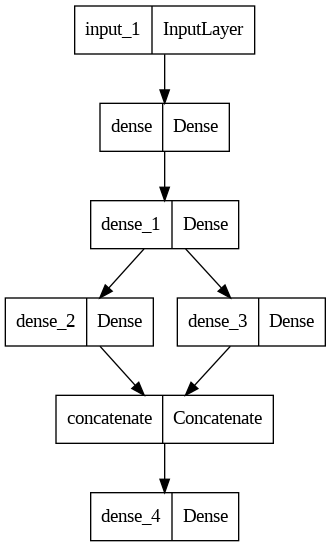

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
 
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Define input layer
inputs = Input(shape=(4,))
 
# Define hidden layers
# x = Dense(8, activation='relu')(inputs)
# x1 = Dense(4, activation='relu')(x)
# x2 = Dense(2, activation = 'relu')(x1)

dense = layers.Dense(64, activation="relu")
x = dense(inputs)
x = layers.Dense(64, activation="relu")(x)
y = layers.Dense(32, activation="relu")(x)
z = layers.Dense(42, activation="relu")(x)
o = layers.Concatenate()([y, z])
outputs = layers.Dense(1)(o)


# Define output layer
# outputs = Dense(1)(x2)
 
# Create model
model = Model(inputs=inputs, outputs=outputs)
 
# Compile model
model.compile(loss='mse', optimizer='adam')
 
# Train model
model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1)
 
# Evaluate model on test set
loss = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
 
 
# Define input value for prediction
X_pred = np.array([[5.1, 3.5, 1.4, 0.2]])
 
# Make prediction
y_pred = model.predict(X_pred)
 
print('Input:', X_pred)
print('Prediction:', y_pred)
keras.utils.plot_model(model)

Epoch 1/100
15/15 [==============================] - 1s 2ms/step - loss: 1.3394 - accuracy: 0.2917
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 1.0749 - accuracy: 0.3417
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9816 - accuracy: 0.7333
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9279 - accuracy: 0.8500
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8936 - accuracy: 0.8333
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8656 - accuracy: 0.9083
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8382 - accuracy: 0.9417
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8150 - accuracy: 0.9417
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7882 - accuracy: 0.9750
Epoch 10/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7657 - accuracy: 0.9417
Epoch 11/

Test loss: 0.09227056801319122
Test accuracy: 1.0


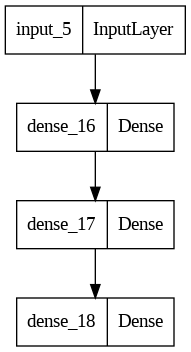

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense

# Load iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define input shape
input_shape = X_train.shape[1]
 
# Define output shape
output_shape = len(np.unique(y))
 
# Define model architecture
inputs = Input(shape=(input_shape,))
x = Dense(10, activation='relu')(inputs)
x = Dense(10, activation='relu')(x)
outputs = Dense(output_shape, activation='softmax')(x)
 
# Define model
model = Model(inputs=inputs, outputs=outputs)
 
# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 
# Train model
model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1)
 
# Evaluate model on test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)
keras.utils.plot_model(model)